In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O
from glob import glob # Unix style pathname pattern expansion
import matplotlib.pyplot as plt # Provides a MATLAB-like way of plotting
%matplotlib inline
import os # Portable way of using operating system dependent functionality
import unittest # Unit test library

import warnings # Disable depricated warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Abstract

Motion sensors such as accelerometers and gyroscopes measure
the instant acceleration and rotation of a device, in three dimensions. Raw data streams from motion sensors embedded in portable and wearable devices may reveal private information about users without their awareness.Plenty of supervised machine learning techniques that use accelerometer and gyroscope signals for automatic Human Activity Recognition (HAR) has been proposed in the last decade. According to recent studies, the combination of accelerometer and gyroscope signals, also called multimodal recognition, increases the accuracy in HAR with respect to the use of each signal alone. This paper presents the results of an analysis we performed in order to compare the effectiveness of machine learning techniques when used separately or jointly on accelerometer and gyroscope signals.

## Data Context

The dataset [here](https://www.kaggle.com/malekzadeh/motionsense-dataset) includes time-series data generated by accelerometer and gyroscope sensors (attitude, gravity, userAcceleration, and rotationRate). It is collected with an iPhone 6s kept in the participant's front pocket using SensingKit which collects information from Core Motion framework on iOS devices. A total of 24 participants in a range of gender, age, weight, and height performed 6 activities in 15 trials in the same environment and conditions: downstairs, upstairs, walking, jogging, sitting, and standing. With this dataset, we aim to look for personal attributes fingerprints in time-series of sensor data, i.e. attribute-specific patterns that can be used to infer gender or personality of the data subjects in addition to their activities.



## Data Content
For each participant, the study had been commenced by collecting their demographic (age and gender) and physically-related (height and weight) information. Then, we provided them with a dedicated smartphone (iPhone 6) and asked them to store it in their trousers' front pocket during the experiment. All the participant were asked to wear flat shoes. We then asked them to perform 6 different activities (walk downstairs, walk upstairs, sit, stand and jogging) around the Queen Mary University of London's Mile End campus. For each trial, the researcher set up the phone and gave it to the current participants, then the researcher stood in a corner. Then, the participant pressed the start button of Crowdsense app and put it in their trousers' front pocket and performed the specified activity. We asked them to do it as natural as possible, like their everyday life. At the end of each trial, they took the phone out of their pocket and pressed the stop button. The exact places and routes for running all the activities are shown in the illustrative map in the following Figure.

As we can see, there are 15 trials:

1. Long trials: those with number 1 to 9 with around 2 to 3 minutes duration.
2. Short trials: those with number 11 to 16 that are around 30 seconds to 1 minutes duration.

There are 24 data subjects. The A_DeviceMotion_data folder contains time-series collected by both Accelerometer and Gyroscope for all 15 trials. For every trial we have a multivariate time-series. Thus, we have time-series with 12 features: attitude.roll, attitude.pitch, attitude.yaw, gravity.x, gravity.y, gravity.z, rotationRate.x, rotationRate.y, rotationRate.z, userAcceleration.x, userAcceleration.y, userAcceleration.z.

The accelerometer measures the sum of two acceleration vectors: gravity and user acceleration. User acceleration is the acceleration that the user imparts to the device. Because Core Motion is able to track a device’s attitude using both the gyroscope and the accelerometer, it can differentiate between gravity and user acceleration. A CMDeviceMotion object provides both measurements in the gravity and userAcceleration properties. [(More info)](https://developer.apple.com/documentation/coremotion/cmdevicemotion)

There are 6 different labels:

1. dws: downstairs

2. ups: upstairs

3. sit: sitting

4. std: standing

5. wlk: walking

6. jog: jogging



Input data files are available in the "../data/" directory.

Data bundles are:

In [2]:
print(os.listdir("data/A_DeviceMotion_data/A_DeviceMotion_data"))

['dws_1', 'dws_11', 'dws_2', 'jog_16', 'jog_9', 'sit_13', 'sit_5', 'std_14', 'std_6', 'ups_12', 'ups_3', 'ups_4', 'wlk_15', 'wlk_7', 'wlk_8']


Read data bundles:

In [3]:
# Data Folders:
folders = glob('data/A_DeviceMotion_data/A_DeviceMotion_data/*_*')
folders = [s for s in folders if "csv" not in s]

df_all_list = []
exp = 0
# Segment the data to 400 sampels frames , each one will be a different Experament
segment_size = 400

# Activety types dict:
activity_codes = {'dws':1,'jog':2,'sit':3,'std':4,'ups':5,'wlk':6}        
activity_types = list(activity_codes.keys())

# Load All data:
for folder in folders:
    csv_path = glob(folder + '/*' )

    for csv in csv_path:
        df = pd.read_csv(csv)
        # Add Activety label, Subject name and Experiment number
        df['Activity'] = activity_codes[folder[45:48]]
        df['Sub_Num'] = csv[len(folder)+5:-4]
        df['Exp_num'] = 1
        exp_num = np.zeros((df.shape[0])) 
        for i in range(0,df.shape[0] - segment_size,segment_size):
            exp_num[range(i,i+segment_size)] = i/segment_size + exp *100 
        df['Exp_num'] = exp_num
        df_all_list.append(df)
        exp += 1        

# Wrap it in pandas
motion_data = pd.concat(df_all_list,axis=0)

# Look at the result
print('Shape: ', motion_data.shape)
print('Columns: ', motion_data.columns)
print('Data sample: ', motion_data.sample(5))
print('Subjects: ', np.unique(motion_data['Sub_Num']))

Shape:  (1412865, 16)
Columns:  Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'Activity', 'Sub_Num',
       'Exp_num'],
      dtype='object')
Data sample:        Unnamed: 0  attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
3335        3335       2.372213       -0.014879     -2.576626   0.695613   
854          854       0.991080       -1.208386     -0.902561   0.296591   
148          148       3.069343       -1.334109      1.948156   0.016926   
6344        6344      -1.552180       -1.198810      1.288491  -0.363404   
2241        2241       0.751613       -1.270918     -0.819833   0.201695   

      gravity.y  gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
3335   0.014879   0.718262        0.003063       -0.008999       -0.011921   
854    0.935045  -0.19419

# Data exploration

We will explore subjects dataset.
We know about columns that:

    0: code [1-24]
    1: weight [kg]
    2: height [cm]
    3: age [years]
    4: gender [0:Female, 1:Male]

In [4]:
subjects_info = pd.read_csv('data\data_subjects_info.csv')
print(subjects_info)

    code  weight  height  age  gender
0      1     102     188   46       1
1      2      72     180   28       1
2      3      48     161   28       0
3      4      90     176   31       1
4      5      48     164   23       0
5      6      76     180   28       1
6      7      62     175   30       0
7      8      52     161   24       0
8      9      93     190   32       1
9     10      72     164   31       0
10    11      70     178   24       1
11    12      60     167   33       1
12    13      60     178   33       1
13    14      70     180   35       1
14    15      70     185   33       1
15    16      96     172   29       0
16    17      76     180   26       1
17    18      54     164   26       0
18    19      78     164   28       0
19    20      88     180   25       1
20    21      52     165   24       1
21    22     100     186   31       1
22    23      68     170   25       0
23    24      74     173   18       0


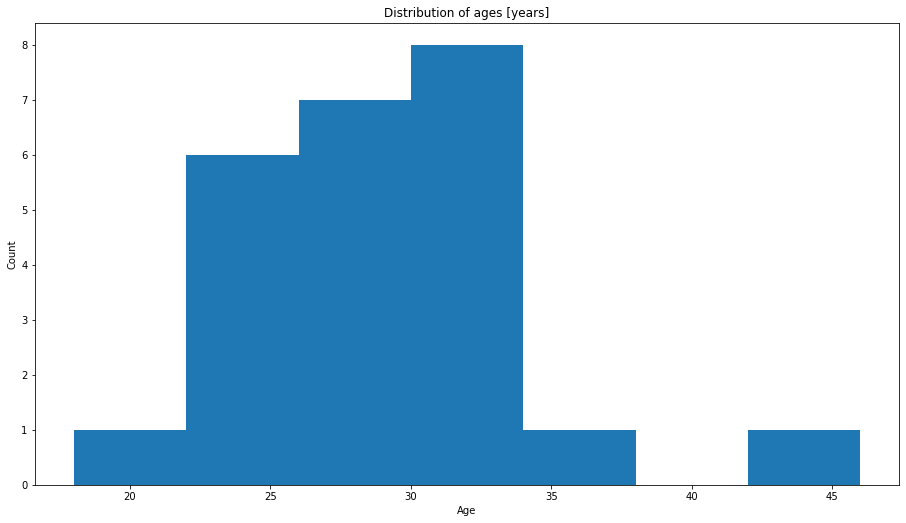

In [5]:
plt.rcParams['figure.figsize'] = (15.5, 8.5)

all_ages = subjects_info['age']

plt.hist(all_ages, bins = 'fd')
plt.title("Distribution of ages [years]")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

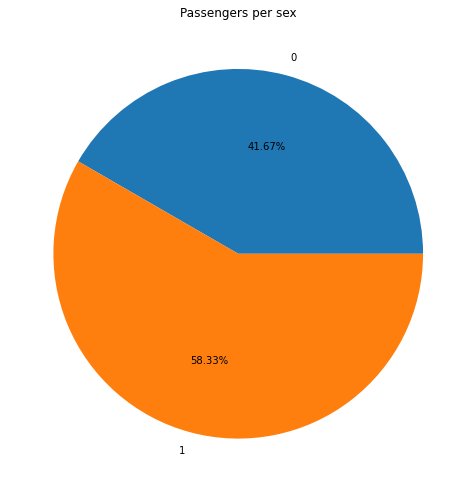

In [6]:
num_passengers_by_sex = subjects_info.groupby('gender').size()

plt.gca().set_aspect("equal")
plt.pie(num_passengers_by_sex, labels = num_passengers_by_sex.index, autopct = "%.2f%%")
plt.title("Passengers per sex")
plt.show()

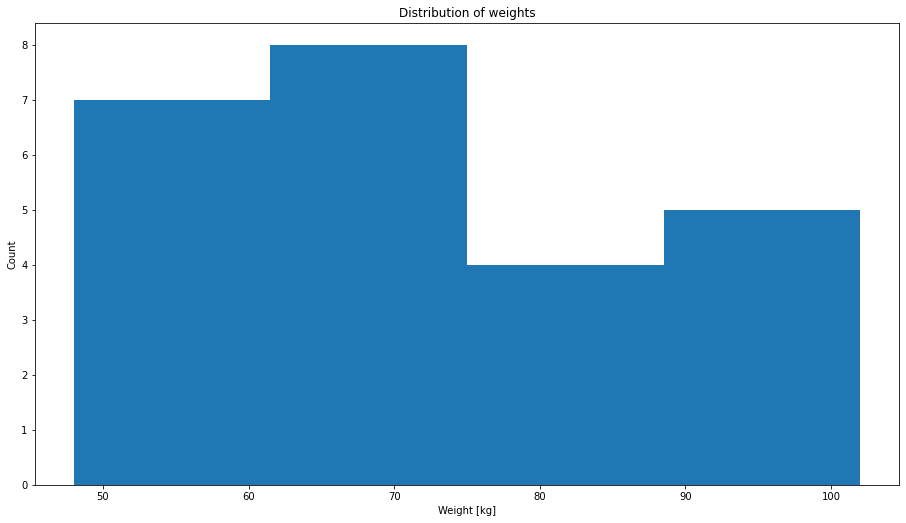

In [7]:
all_weight = subjects_info['weight']

plt.hist(all_weight, bins = 'fd')
plt.title("Distribution of weights")
plt.xlabel('Weight [kg]')
plt.ylabel('Count')
plt.show()

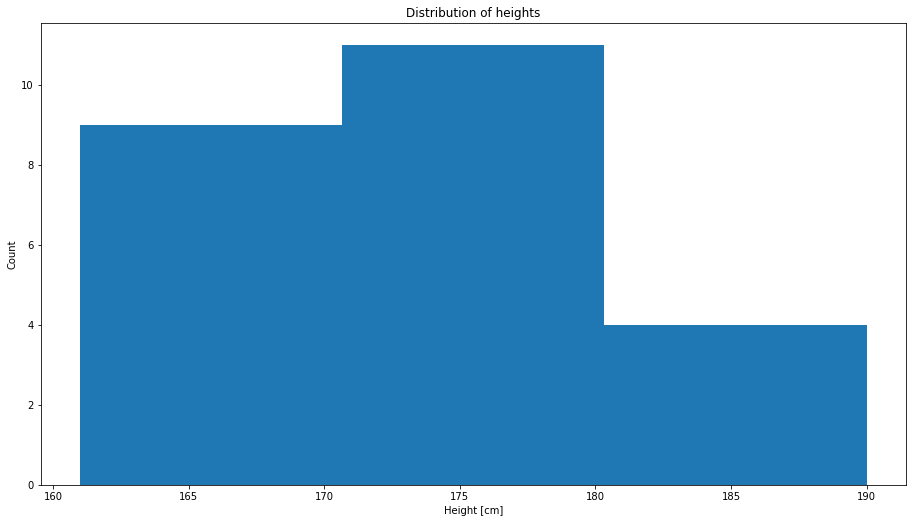

In [8]:
all_height = subjects_info['height']

plt.hist(all_height, bins = 'fd')
plt.title("Distribution of heights")
plt.xlabel('Height [cm]')
plt.ylabel('Count')
plt.show()

## Observations:
- There are 24 subject collected data 
- Most of the people are between 25-30 years old
- Around 60% of the subjects are male
- There is no significant difference in their heights and weights

## Data Characterization

### Missing values check

In [9]:
checks = pd.isna(motion_data).sum()
print(checks)

Unnamed: 0            0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
Activity              0
Sub_Num               0
Exp_num               0
dtype: int64


It seems like there are no missing values.

### Tables join

In [10]:
# Look at column types
print('Data column types:\n', motion_data.dtypes, end='\n\n')
print('Subjects: column types\n:', subjects_info.dtypes, end='\n\n')

# Cast object to int64 to perform merge on this colums
motion_data['Sub_Num'] = pd.to_numeric(motion_data['Sub_Num']).astype(np.int64) 

# Merge data sets
motion_data_with_subject = pd.merge(motion_data, subjects_info, how='left', on=None, left_on='Sub_Num', right_on='code')

# Looking at the results
print(motion_data_with_subject.sample(2))

Data column types:
 Unnamed: 0              int64
attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
Activity                int64
Sub_Num                object
Exp_num               float64
dtype: object

Subjects: column types
: code      int64
weight    int64
height    int64
age       int64
gender    int64
dtype: object

        Unnamed: 0  attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
395241        5344      -2.576894       -0.212474       0.33124  -0.523127   
438235        9704      -0.265355       -0.051462      -0.14812  -0.261905   

        gravity.y  gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
395241   0.210879   0.825753        0.003104      

### Comparing count of records of different subjects

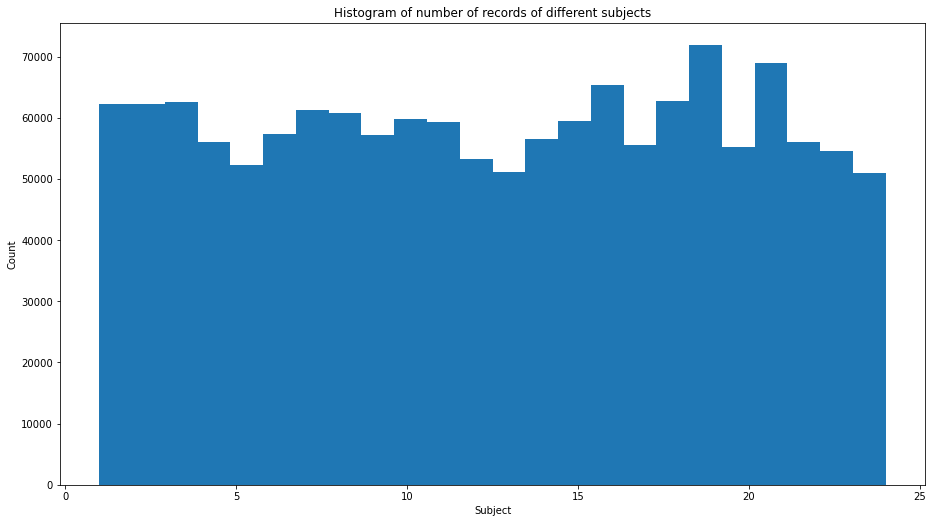

In [11]:
plt.hist(motion_data['Sub_Num'],bins = 24)
plt.title('Histogram of number of records of different subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

We found that there is no significant difference in number of records of different subjects

### Comparing activity types in dataset

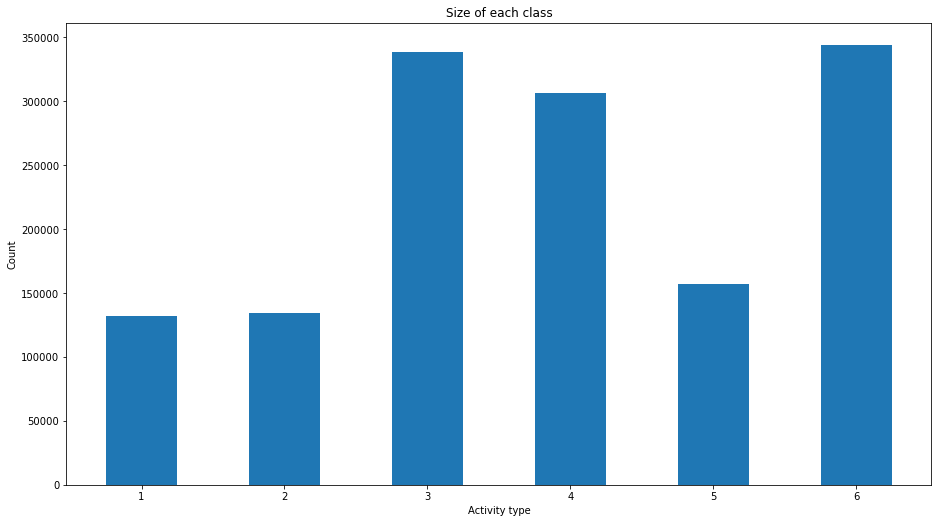

In [12]:
plt.hist(motion_data['Activity'],bins=range(1,8),rwidth=0.5,align='left')
plt.title('Size of each class')
plt.xlabel('Activity type')
plt.ylabel('Count')
plt.show()

We found that most of the activities are 'sit', 'stand' and 'walk'

### Comparing time series

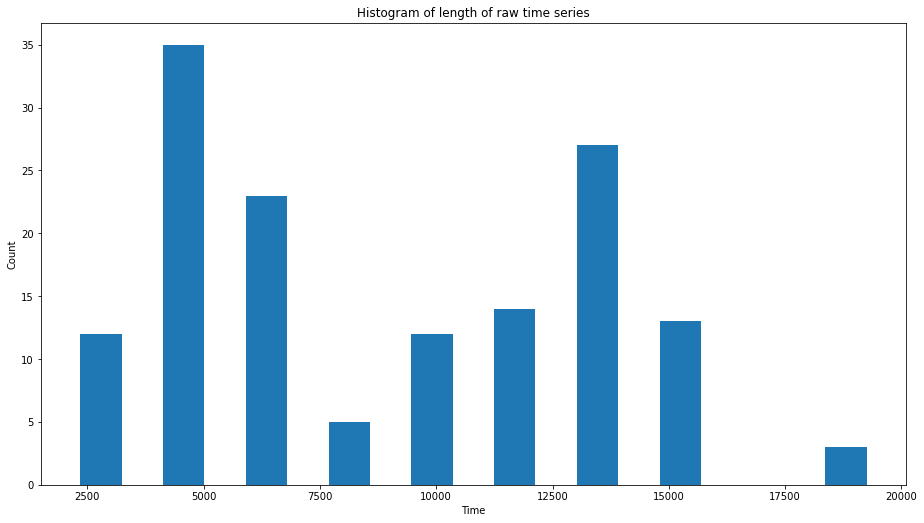

In [13]:
series_length = motion_data.groupby(['Activity', 'Sub_Num']).size()
plt.hist(series_length,rwidth=0.5,align='left')
plt.title('Histogram of length of raw time series')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

### Comparing motion types


Motion type by X coordinate:


S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


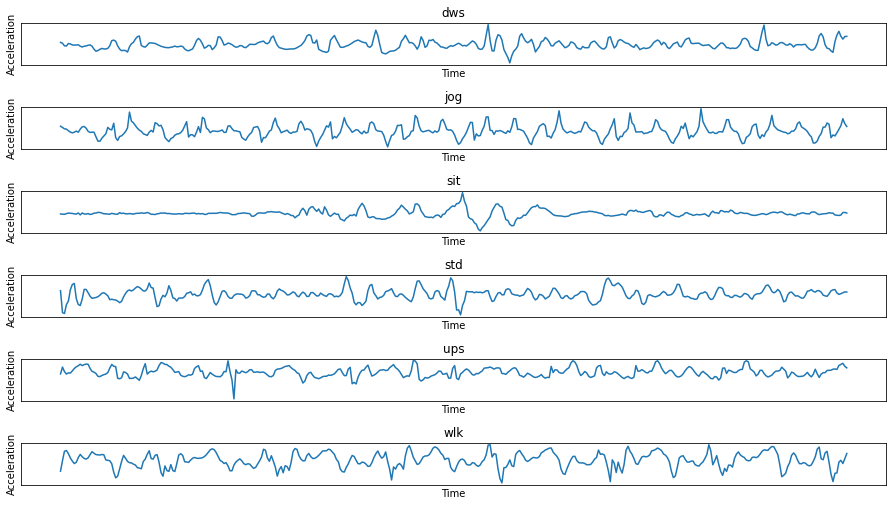


Motion type by Y coordinate:


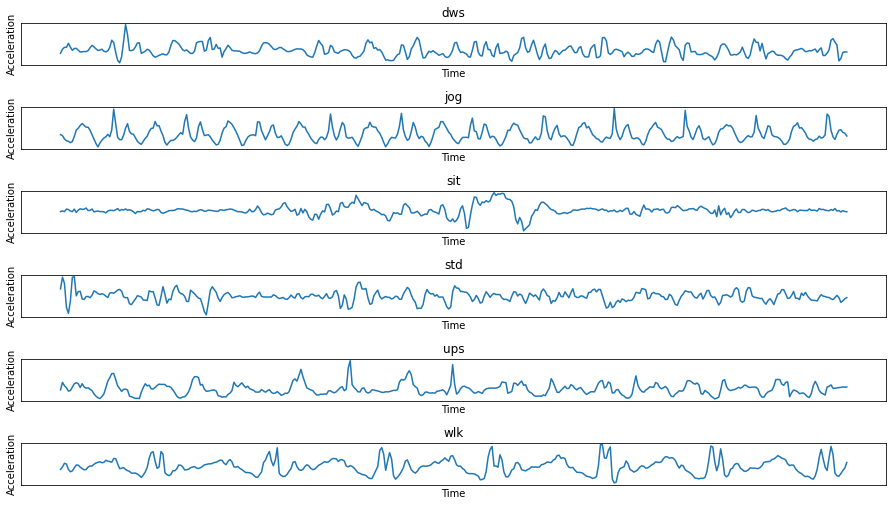


Motion type by Z coordinate:


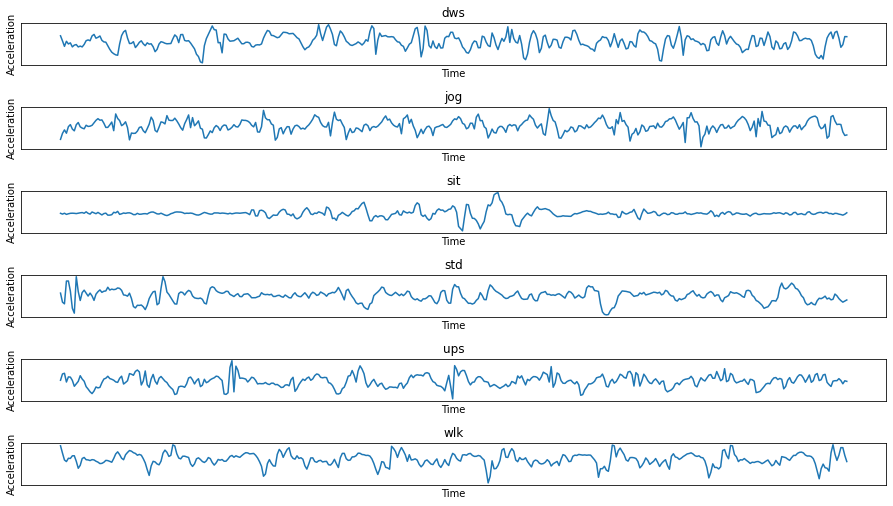

In [14]:
### show the first few records of motion type
coordinates = ['x','y','z']
figure_num = 3

for c in coordinates:
    plt.figure(figure_num)
    figure_num = figure_num + 1
    print('\nMotion type by ' + c.upper() + ' coordinate:')
    
    for act in activity_types:
        plt.subplot('61'+str(activity_codes[act]))
        plt.subplots_adjust(hspace=1.0)
        df = motion_data[motion_data['Activity']==activity_codes[act]]
        plt.title(act)
        plt.xlabel('Time')
        plt.ylabel('Acceleration')
        plt.plot(df['userAcceleration.' + c][:400])
        plt.xticks([]) # turn off x labels
        plt.yticks([])  # turn off y labels
        
    plt.show()

From above analysis,
this dataset raised concern on class imbalance.
The distribution of time-series length is broad.

### Feature Construction:

In [15]:
#  Calculate features
df_sum = motion_data.groupby('Exp_num', axis=0).mean().reset_index()
df_sum.columns = df_sum.columns.str.replace('.','_sum_')

df_sum_SS = np.power(motion_data.astype(float),2).groupby('Exp_num', axis=0).median().reset_index() 
df_sum_SS.columns = df_sum_SS.columns.str.replace('.','_sumSS_')

df_max = motion_data.groupby('Exp_num', axis=0).max().reset_index()
df_max.columns = df_max.columns.str.replace('.','_max_')

df_min = motion_data.groupby('Exp_num', axis=0).min().reset_index()
df_min.columns = df_min.columns.str.replace('.','_min_')

df_skew = motion_data.groupby('Exp_num', axis=0).skew().reset_index()
df_skew.columns = df_skew.columns.str.replace('.','_skew_')

df_std = motion_data.groupby('Exp_num', axis=0).std().reset_index()
df_std.columns = df_std.columns.str.replace('.','_std_')

Df_Features = pd.concat([ df_max , df_sum[df_sum.columns[2:-2]], 
                         df_min[df_min.columns[2:-2]], df_sum_SS[df_sum_SS.columns[2:-2]], 
                         df_std[df_std.columns[2:-2]], df_skew[df_skew.columns[2:-2]]], axis=1)
#print(Df_Features)

X = Df_Features.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'],axis=1)
Y = Df_Features['Activity']

print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (3359, 72)
Shape of Y: (3359,)


## Check the similarity between motion types

### Correlation matrix

The correlation matrix of $n$ random variables $X_{1},...,X_{2}$ is $nxn$ matrix whose $(i,j)$ entry is $cor(X_{i},X_{j})$  If the measures of correlation used are product-moment coefficients, the correlation matrix is the same as the covariance matrix of the standardized random variables $X_{i}/\sigma X_{i}$ for $i = 1,...,n$ This applies both to the matrix of population correlations (in which case $\sigma$ }  is the population standard deviation), and to the matrix of sample correlations (in which case $\sigma$  denotes the sample standard deviation). Consequently, each is necessarily a positive-semidefinite matrix. Moreover, the correlation matrix is strictly positive definite if no variable can have all its values exactly generated as a linear function of the values of the others.

The correlation matrix is symmetric because the correlation between {\displaystyle X_{i}}X_{i} and {\displaystyle X_{j}}X_{j} is the same as the correlation between $X_{j}$ and $X_{i}$.

A correlation matrix appears, for example, in one formula for the coefficient of multiple determination, a measure of goodness of fit in multiple regression.

In [16]:
Df_Features.corr()

,Exp_num,Unnamed: 0,attitude_max_roll,attitude_max_pitch,attitude_max_yaw,gravity_max_x,gravity_max_y,gravity_max_z,rotationRate_max_x,rotationRate_max_y,...,attitude_skew_yaw,gravity_skew_x,gravity_skew_y,gravity_skew_z,rotationRate_skew_x,rotationRate_skew_y,rotationRate_skew_z,userAcceleration_skew_x,userAcceleration_skew_y,userAcceleration_skew_z
Exp_num,1.000000,0.036379,0.135931,-0.176740,0.071511,0.016726,0.291523,0.121863,0.128482,0.119146,...,0.039045,0.005242,0.012610,0.024283,0.077545,0.081318,-0.023351,-0.051071,0.096594,-0.086213
Unnamed: 0,0.036379,1.000000,-0.266745,0.002473,-0.348909,-0.115868,-0.186610,-0.190355,-0.374968,-0.330877,...,-0.015321,0.069444,0.224428,0.060653,-0.047734,0.039619,0.004082,0.013635,-0.217249,0.033988
attitude_max_roll,0.135931,-0.266745,1.000000,-0.119368,0.483533,0.651797,0.334869,0.032460,0.483268,0.443778,...,0.060329,-0.015276,-0.252857,0.057388,0.088576,-0.021880,-0.003246,0.085116,0.270208,-0.029973
attitude_max_pitch,-0.176740,0.002473,-0.119368,1.000000,-0.051944,0.125759,-0.812178,-0.194344,-0.002724,0.021522,...,-0.025339,-0.019967,0.109924,0.054596,-0.011455,0.008153,-0.003108,0.040761,-0.089553,0.006257
attitude_max_yaw,0.071511,-0.348909,0.483533,-0.051944,1.000000,0.116980,0.354047,0.332757,0.593209,0.535473,...,0.065493,0.004616,-0.334400,0.001574,0.067129,0.003983,0.029135,-0.115492,0.290818,-0.051108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rotationRate_skew_y,0.081318,0.039619,-0.021880,0.008153,0.003983,-0.034666,-0.010656,0.048701,-0.001339,0.080567,...,0.008664,0.068170,0.001354,-0.020011,-0.079694,1.000000,0.046368,-0.019707,-0.057861,0.048700
rotationRate_skew_z,-0.023351,0.004082,-0.003246,-0.003108,0.029135,0.016031,0.030281,0.005705,0.016289,-0.025395,...,-0.030627,-0.010703,-0.016127,0.024924,0.050747,0.046368,1.000000,0.050187,0.088898,0.067712
userAcceleration_skew_x,-0.051071,0.013635,0.085116,0.040761,-0.115492,0.219147,-0.068855,-0.093854,-0.050823,-0.044476,...,0.018332,-0.081898,-0.014497,0.066383,0.070893,-0.019707,0.050187,1.000000,0.046572,-0.051284
userAcceleration_skew_y,0.096594,-0.217249,0.270208,-0.089553,0.290818,0.175328,0.318043,0.211579,0.383616,0.331008,...,-0.001841,-0.093837,-0.211973,-0.021524,0.111434,-0.057861,0.088898,0.046572,1.000000,-0.032281


### Principal component analysis

Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared perpendicular distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called Principal Components, and several related procedures Principal Component Analysis (PCA).

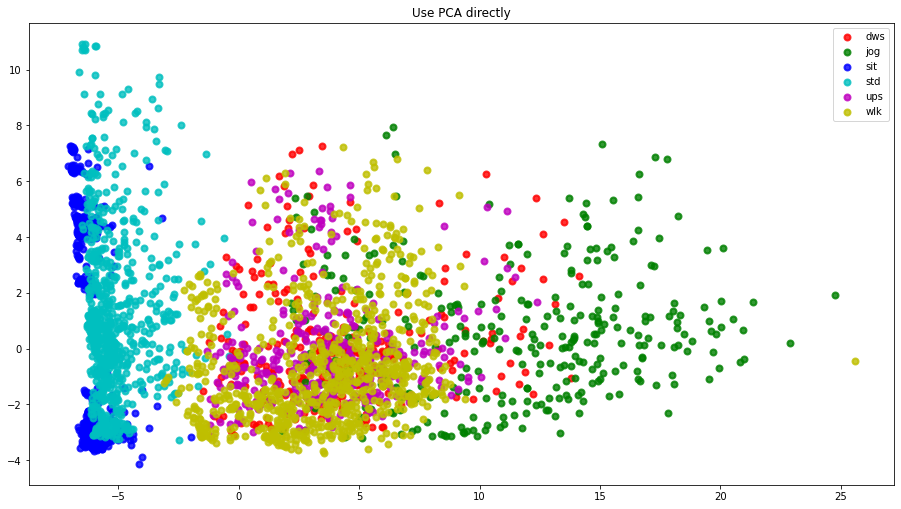

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### dimension reduction
### use pca to reduce the dimension to 2D directly.
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#print(X_r[Y == 6, 0])

plt.figure(1)
colors = ['r','g','b','c','m','y','k']
lw = 2

for color, i, target_name in zip(colors, range(6), activity_types):
    plt.scatter(X_r[Y == i + 1, 0], X_r[Y == i + 1, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Use PCA directly')
plt.show()

### T-distributed stochastic neighbor embedding

T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization developed by Laurens van der Maaten and Geoffrey Hinton.[1] It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a very low probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate.

t-SNE has been used for visualization in a wide range of applications, including computer security research,[2] music analysis,[3] cancer research,[4] bioinformatics,[5] and biomedical signal processing.[6] It is often used to visualize high-level representations learned by an artificial neural network.[7]

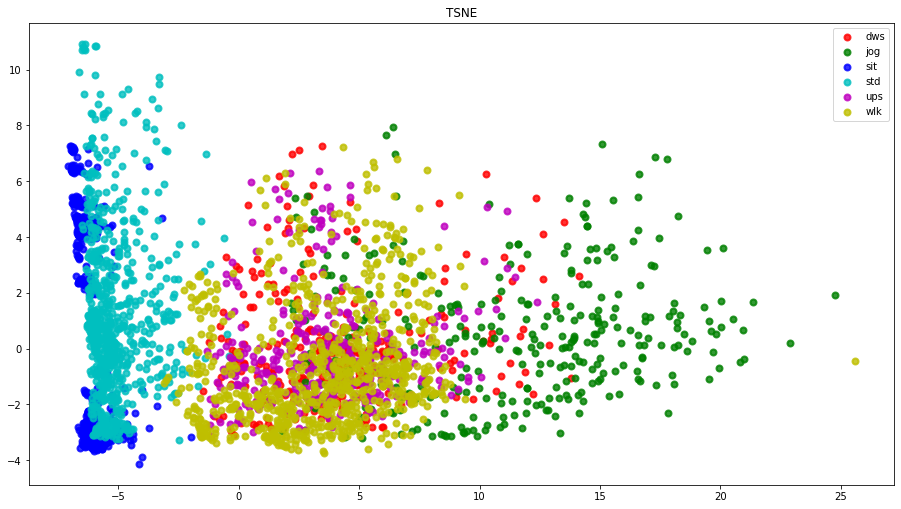

In [46]:
### sklearn tsne
# sites.google.com/s/1HAV-HEiBhPHLgdh5Ejmu31TrVIQqw9HU/p/1bPpOCDlxW7i5nOpy3bvpnmkqa8Y-SDVa/edit
# Scale data
scl = StandardScaler()
scaled_X = scl.fit_transform(X)

# Reduce dimensions before feeding into tsne
pca = PCA(n_components=0.9, random_state=3)
pca_transformed = pca.fit_transform(scaled_X)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(pca_transformed)

plt.figure(2)
for color, i, target_name in zip(colors, range(6), activity_types):
    plt.scatter(X_r[Y == i + 1, 0], X_r[Y == i + 1, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE')
plt.show()

## Logistic regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression [8] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

### Cross-validation

A dataset can be repeatedly split into a training dataset and a validation dataset: this is known as cross-validation. These repeated partitions can be done in various ways, such as dividing into 2 equal datasets and using them as training/validation, and then validation/training, or repeatedly selecting a random subset as a validation dataset. To validate the model performance, sometimes an additional test dataset that was held out from cross-validation is used. The most used case is to split data to 70% train set and 30% test set.


#### Standardize Time Series Data

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data. Like normalization, standardization can be useful, and even required in some machine learning algorithms when your time series data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your time series data if this expectation is not met, but you may not get reliable results. This includes algorithms like Support Vector Machines, Linear and Logistic Regression, and other algorithms that assume or have improved performance with Gaussian data. Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.



In [19]:
from sklearn.model_selection import train_test_split

# Splitting data
train_x, test_x, train_y, test_y = train_test_split(
# Standardize data
StandardScaler().fit_transform(X), 
Y,
test_size=1/7.0, random_state=0)


### Model creation

In sklearn, all machine learning models are implemented as Python classes.
Model is learning the relationship between digits (train_x) and labels (train_y)

In [20]:
from sklearn.linear_model import LogisticRegression
import time

now = time.time()
# all parameters not specified are set to their defaults
# solver is lbfgs - Default solver
logisticRegrWithDefaultSolver = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

logisticRegrWithDefaultSolver.fit(train_x, train_y)

print('Model created with \'lbfgs\' solver!')
print('Time needed: ', time.time() - now, ' seconds.')

Model created with 'lbfgs' solver!
Time needed:  0.9999208450317383  seconds.


In [21]:
from sklearn.linear_model import LogisticRegression
import time

now = time.time()
# all parameters not specified are set to their defaults
# solver is liblinear
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 1000)

logisticRegr.fit(train_x, train_y)

print('Model created with \'liblinear\' solver!')
print('Time needed: ', time.time() - now, ' seconds.')

Model created with 'liblinear' solver!
Time needed:  0.6479461193084717  seconds.


### Measuring Model Performance 

In [22]:
from sklearn import metrics

print('lbfgs:')
# Mean Absolute Error (MAE)
predictions_lbfgs = logisticRegrWithDefaultSolver.predict(test_x)
mae = metrics.mean_absolute_error(test_y, predictions_lbfgs)
print("Mean Absolute Error (MAE) is: ", mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(test_y, predictions_lbfgs)
print("Mean Squared Error (MSE) is: ", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(test_y, predictions_lbfgs))
print("Root Mean Squared Error (RMSE) is: ", rmse)

print('\n\nliblinear:')
# Mean Absolute Error (MAE)
predictions_liblinear = logisticRegr.predict(test_x)
mae = metrics.mean_absolute_error(test_y, predictions_liblinear)
print("Mean Absolute Error (MAE) is: ", mae)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(test_y, predictions_liblinear)
print("Mean Squared Error (MSE) is: ", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(test_y, predictions_liblinear))
print("Root Mean Squared Error (RMSE) is: ", rmse)

lbfgs:
Mean Absolute Error (MAE) is:  0.07708333333333334
Mean Squared Error (MSE) is:  0.3020833333333333
Root Mean Squared Error (RMSE) is:  0.5496210815947049


liblinear:
Mean Absolute Error (MAE) is:  0.07083333333333333
Mean Squared Error (MSE) is:  0.26666666666666666
Root Mean Squared Error (RMSE) is:  0.5163977794943222


### Classification report
Scikit-learn has an excellent built-in module called classification_report that makes it easy to measure the performance of a classification machine learning model. We will use this module to measure the performance of the model that we just created

In [23]:
from sklearn.metrics import classification_report

report_lbfgs = classification_report(test_y, predictions_lbfgs)
print('lbfgs:\n',report_lbfgs)

report_liblinear = classification_report(test_y, predictions_liblinear)
print('\n\nliblinear:\n',report_lbfgs)

lbfgs:
               precision    recall  f1-score   support

           1       0.90      0.90      0.90        41
           2       1.00      0.98      0.99        60
           3       1.00      0.99      1.00       119
           4       1.00      0.99      0.99        96
           5       0.90      1.00      0.95        53
           6       0.99      0.96      0.98       111

    accuracy                           0.98       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.98      0.98      0.98       480



liblinear:
               precision    recall  f1-score   support

           1       0.90      0.90      0.90        41
           2       1.00      0.98      0.99        60
           3       1.00      0.99      1.00       119
           4       1.00      0.99      0.99        96
           5       0.90      1.00      0.95        53
           6       0.99      0.96      0.98       111

    accuracy                           0.98       480
 

### Confusion matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[9] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[10] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [24]:
from sklearn.metrics import confusion_matrix

cmatrix_lbfgs = confusion_matrix(test_y, predictions_lbfgs)
print('lbfgs:\n',cmatrix_lbfgs)

cmatrixt_liblinear = confusion_matrix(test_y, predictions_liblinear)
print('\n\nliblinear:\n',cmatrixt_liblinear)

lbfgs:
 [[ 37   0   0   0   4   0]
 [  0  59   0   0   0   1]
 [  1   0 118   0   0   0]
 [  1   0   0  95   0   0]
 [  0   0   0   0  53   0]
 [  2   0   0   0   2 107]]


liblinear:
 [[ 37   0   0   0   4   0]
 [  0  58   0   0   1   1]
 [  0   0 118   0   1   0]
 [  1   0   0  95   0   0]
 [  0   0   0   0  53   0]
 [  1   0   0   0   1 109]]


### Model accuracy

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going use accuracy as our metric.
Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [25]:
scoreDefault = logisticRegrWithDefaultSolver.score(test_x, test_y)
print("lbfgs accuracy is: ", scoreDefault)

score = logisticRegr.score(test_x, test_y)
print("liblinear accuracy is: ", score)

lbfgs accuracy is:  0.9770833333333333
liblinear accuracy is:  0.9791666666666666


One timportant thing is that is the default optimization algorithm parameter was solver = lbfgs and it took 1.0139882564544678 seconds to run with a accuracy of 97.70%. When I set solver = liblinear , it took 0.7409329414367676 seconds to run with an accuracy of 97.91%. Changing the solver had a minor effect on accuracy and it was a lot faster.

Below is an illustration of various learning-rate methods, showing higher performance of adaptive methods, in two differebt configurations of extrema.

![title](img/AlgorithmCompare.gif)
![title](img/AlgorithmCompare2.gif)

[More information](https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms)

# Test the model

In [26]:
predicted_result = logisticRegrWithDefaultSolver.predict(test_x)

test_of_model = pd.DataFrame(predicted_result.T,
                   columns=['Predicted'])
test_of_model['Actual'] = test_y.array

print(test_of_model.sample(10))

     Predicted  Actual
49           2       2
278          5       5
477          3       3
309          4       4
146          3       3
37           1       1
458          1       1
58           3       3
39           4       4
397          3       3


In [27]:
class TestModel(unittest.TestCase):

    #TODO: AAA
    def test_not_none(self):
        self.assertIsNotNone(X)
        self.assertIsNotNone(Y)
        self.assertIsNotNone(logisticRegr)
        
    def test_work(self):
        predicted_result = logisticRegr.predict(X.head(10))
        
        self.assertIsNotNone(predicted_result)
        
    def test_acc(self):
        predicted_result = logisticRegr.predict(test_x).T
        actual_result = test_y.array
        size = len(test_x)
        correct_answers = 0
        wanted_acc_percentage = 96
        
        for i in range(size):
            if(predicted_result[i] == actual_result[i]):
                correct_answers += 1
        
        self.assertGreater(correct_answers, 0)
        self.assertGreater(100/(size/correct_answers), wanted_acc_percentage)


unittest.main(argv=[''], verbosity=2, exit=False)


test_acc (__main__.TestModel) ... ok
test_not_none (__main__.TestModel) ... ok
test_work (__main__.TestModel) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.043s

OK


# Conclusion

In this paper, recognition accuracy of up to 97.91% on various everyday activities using a single triaxial accelerometer was obtained. The data were acquired from multiple subjects under real-world conditions.

We further saw that this recognition method can detect activities independent of smartphone’s
position. For future work, will be good to extend activity recognition task to detect additional activities.

# Bibliography
1. van der Maaten, L.J.P.; Hinton, G.E. (Nov 2008). "Visualizing Data Using t-SNE" (PDF). Journal of Machine Learning Research. 9: 2579–2605.
2. Gashi, I.; Stankovic, V.; Leita, C.; Thonnard, O. (2009). "An Experimental Study of Diversity with Off-the-shelf AntiVirus Engines". Proceedings of the IEEE International Symposium on Network Computing and Applications: 4–11.
3. Hamel, P.; Eck, D. (2010). "Learning Features from Music Audio with Deep Belief Networks". Proceedings of the International Society for Music Information Retrieval Conference: 339–344.
4. Jamieson, A.R.; Giger, M.L.; Drukker, K.; Lui, H.; Yuan, Y.; Bhooshan, N. (2010). "Exploring Nonlinear Feature Space Dimension Reduction and Data Representation in Breast CADx with Laplacian Eigenmaps and t-SNE". Medical Physics. 37 (1): 339–351. doi:10.1118/1.3267037. PMC 2807447. PMID 20175497.
5. Wallach, I.; Liliean, R. (2009). "The Protein-Small-Molecule Database, A Non-Redundant Structural Resource for the Analysis of Protein-Ligand Binding". Bioinformatics. 25 (5): 615–620. doi:10.1093/bioinformatics/btp035. PMID 19153135.
6. Birjandtalab, J.; Pouyan, M. B.; Nourani, M. (2016-02-01). Nonlinear dimension reduction for EEG-based epileptic seizure detection. 2016 IEEE-EMBS International Conference on Biomedical and Health Informatics (BHI). pp. 595–598. doi:10.1109/BHI.2016.7455968. ISBN 978-1-5090-2455-1.
7. Visualizing Representations: Deep Learning and Human Beings Christopher Olah's blog, 2015
8.  Tolles, Juliana; Meurer, William J (2016). "Logistic Regression Relating Patient Characteristics to Outcomes". JAMA. 316 (5): 533–4. doi:10.1001/jama.2016.7653. ISSN 0098-7484. OCLC 6823603312. PMID 27483067.
9. Stehman, Stephen V. (1997). "Selecting and interpreting measures of thematic classification accuracy". Remote Sensing of Environment. 62 (1): 77–89. Bibcode:1997RSEnv..62...77S. doi:10.1016/S0034-4257(97)00083-7.
10.  Powers, David M W (2011). "Evaluation: From Precision, Recall and F-Measure to ROC, Informedness, Markedness & Correlation". Journal of Machine Learning Technologies. 2 (1): 37–63. S2CID 55767944.
